In [1]:
library(readxl) ## Leer excel
library(tidyverse) ## Manipular base de datos
library(igraph) ## Grafos
library(expm) 
library(writexl)
library(ggraph)
library(tidygraph)  # para manipular grafos estilo tidy


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Adjuntando el paquete: 'igraph'


The following objects are masked from 'package:lubridate':

    %--%, union


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:purrr':

    compose, simplify


The following object is masked from 'package:tidyr':

    crossing


The following object is masked from 'package:tibble':

    as_data_frame


The following objects are masked from 'package:s

In [ ]:
# Lee un archivo Excel ubicado en la ruta especificada
matriz <- read_excel(
    "C:/Users/cfutr/OneDrive/Escritorio/CICS/2025/Tesis/Objetivos de Aprendizaje/Modelo/datos/Raw_Data/Matriz_de_Adyacencia_Pensiones_validada.xlsx", col_names=FALSE)

New names:
• `` -> `...1`
• `` -> `...2`
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`
• `` -> `...16`
• `` -> `...17`
• `` -> `...18`
• `` -> `...19`
• `` -> `...20`
• `` -> `...21`
• `` -> `...22`
• `` -> `...23`
• `` -> `...24`
• `` -> `...25`
• `` -> `...26`
• `` -> `...27`
• `` -> `...28`
• `` -> `...29`
• `` -> `...30`
• `` -> `...31`
• `` -> `...32`
• `` -> `...33`
• `` -> `...34`
• `` -> `...35`
• `` -> `...36`
• `` -> `...37`
• `` -> `...38`
• `` -> `...39`
• `` -> `...40`
• `` -> `...41`
• `` -> `...42`
• `` -> `...43`
• `` -> `...44`
• `` -> `...45`
• `` -> `...46`
• `` -> `...47`
• `` -> `...48`
• `` -> `...49`
• `` -> `...50`
• `` -> `...51`
• `` -> `...52`
• `` -> `...53`
• `` -> `...54`
• `` -> `...55`
• `` -> `...56`
• `` -> `...57`
• `` -> `...58`
• `` -> `...59`
• `` -> `...60`
• `` -> `...61`
• `` -> `...62`
• `` -

In [3]:
matriz<-matriz%>% select(-1)%>%slice(-1)%>%
set_names(as.character(unlist(slice(., 1))))%>%
slice(-1)

In [4]:
# Toma el data frame `matriz` (cargado desde un archivo Excel previamente)
# y lo transforma en una matriz de adyacencia numérica.

matriz_adj<-matriz%>%
  column_to_rownames(var = colnames(.)[1])%>% #Convierte la primera columna (por ejemplo, "Concepto") en los nombres de las filas.                         
  mutate(across(everything(), as.numeric)) %>%  #Aplica `as.numeric()` a todas las columnas del data frame.
  as.matrix() #Convierte el data frame limpio en una matriz

In [5]:
# Reemplaza todos los valores NA (valores perdidos) en la matriz de adyacencia `matriz_adj` por ceros.
matriz_adj[is.na(matriz_adj)] <- 0

In [6]:
# Crea un grafo dirigido (objeto de clase `igraph`) a partir de la matriz de adyacencia `matriz_adj`.

g <- graph_from_adjacency_matrix(matriz_adj, mode = "directed")

In [7]:
# Convertimos a data.frame las aristas
aristas <- as_data_frame(g, what = "edges")

# Generamos un identificador de cada par como "A--B" ordenado alfabéticamente
aristas$pair_id <- apply(aristas[, c("from", "to")], 1, function(x) paste(sort(x), collapse = "--"))

# Contamos cuántas veces aparece cada par (si es 2, hay doble dirección)
dobles <- aristas %>%
  group_by(pair_id) %>%
  filter(n() == 2) %>%
  ungroup()

# Resultado: lista de aristas que forman relaciones bidireccionales
dobles

from,to,pair_id
<chr>,<chr>,<chr>
Definicion_SCOMP,Condiciones_Especiales_RV,Condiciones_Especiales_RV--Definicion_SCOMP
Definicion_SCOMP,Periodo_Garantizado,Definicion_SCOMP--Periodo_Garantizado
Definicion_SCOMP,Clausula_Incremento_Sobrevivencia,Clausula_Incremento_Sobrevivencia--Definicion_SCOMP
Definicion_SCOMP,Aumento_Temporal,Aumento_Temporal--Definicion_SCOMP
Renta_Vitalicia,Pension_Sobrevivencia,Pension_Sobrevivencia--Renta_Vitalicia
Condiciones_Especiales_RV,Definicion_SCOMP,Condiciones_Especiales_RV--Definicion_SCOMP
Periodo_Garantizado,Definicion_SCOMP,Definicion_SCOMP--Periodo_Garantizado
Clausula_Incremento_Sobrevivencia,Definicion_SCOMP,Clausula_Incremento_Sobrevivencia--Definicion_SCOMP
Aumento_Temporal,Definicion_SCOMP,Aumento_Temporal--Definicion_SCOMP


In [8]:
pares_bidireccionales <- unique(dobles$pair_id)
pares_bidireccionales%>%as.data.frame() 

.
<chr>
Condiciones_Especiales_RV--Definicion_SCOMP
Definicion_SCOMP--Periodo_Garantizado
Clausula_Incremento_Sobrevivencia--Definicion_SCOMP
Aumento_Temporal--Definicion_SCOMP
Pension_Sobrevivencia--Renta_Vitalicia


In [9]:
matriz_adj["Definicion_SCOMP","Condiciones_Especiales_RV" ] <- 0
matriz_adj["Definicion_SCOMP", "Periodo_Garantizado"] <- 0
matriz_adj["Definicion_SCOMP", "Clausula_Incremento_Sobrevivencia"] <- 0
matriz_adj["Definicion_SCOMP", "Aumento_Temporal"] <- 0
matriz_adj["Renta_Vitalicia", "Pension_Sobrevivencia"] <- 0

In [10]:
# Crea un grafo dirigido (objeto de clase `igraph`) a partir de la matriz de adyacencia `matriz_adj`.

g <- graph_from_adjacency_matrix(matriz_adj, mode = "directed")

In [11]:
# Convertimos a data.frame las aristas
aristas <- as_data_frame(g, what = "edges")

# Generamos un identificador de cada par como "A--B" ordenado alfabéticamente
aristas$pair_id <- apply(aristas[, c("from", "to")], 1, function(x) paste(sort(x), collapse = "--"))

# Contamos cuántas veces aparece cada par (si es 2, hay doble dirección)
dobles <- aristas %>%
  group_by(pair_id) %>%
  filter(n() == 2) %>%
  ungroup()

# Resultado: lista de aristas que forman relaciones bidireccionales
dobles

from,to,pair_id
<chr>,<chr>,<chr>


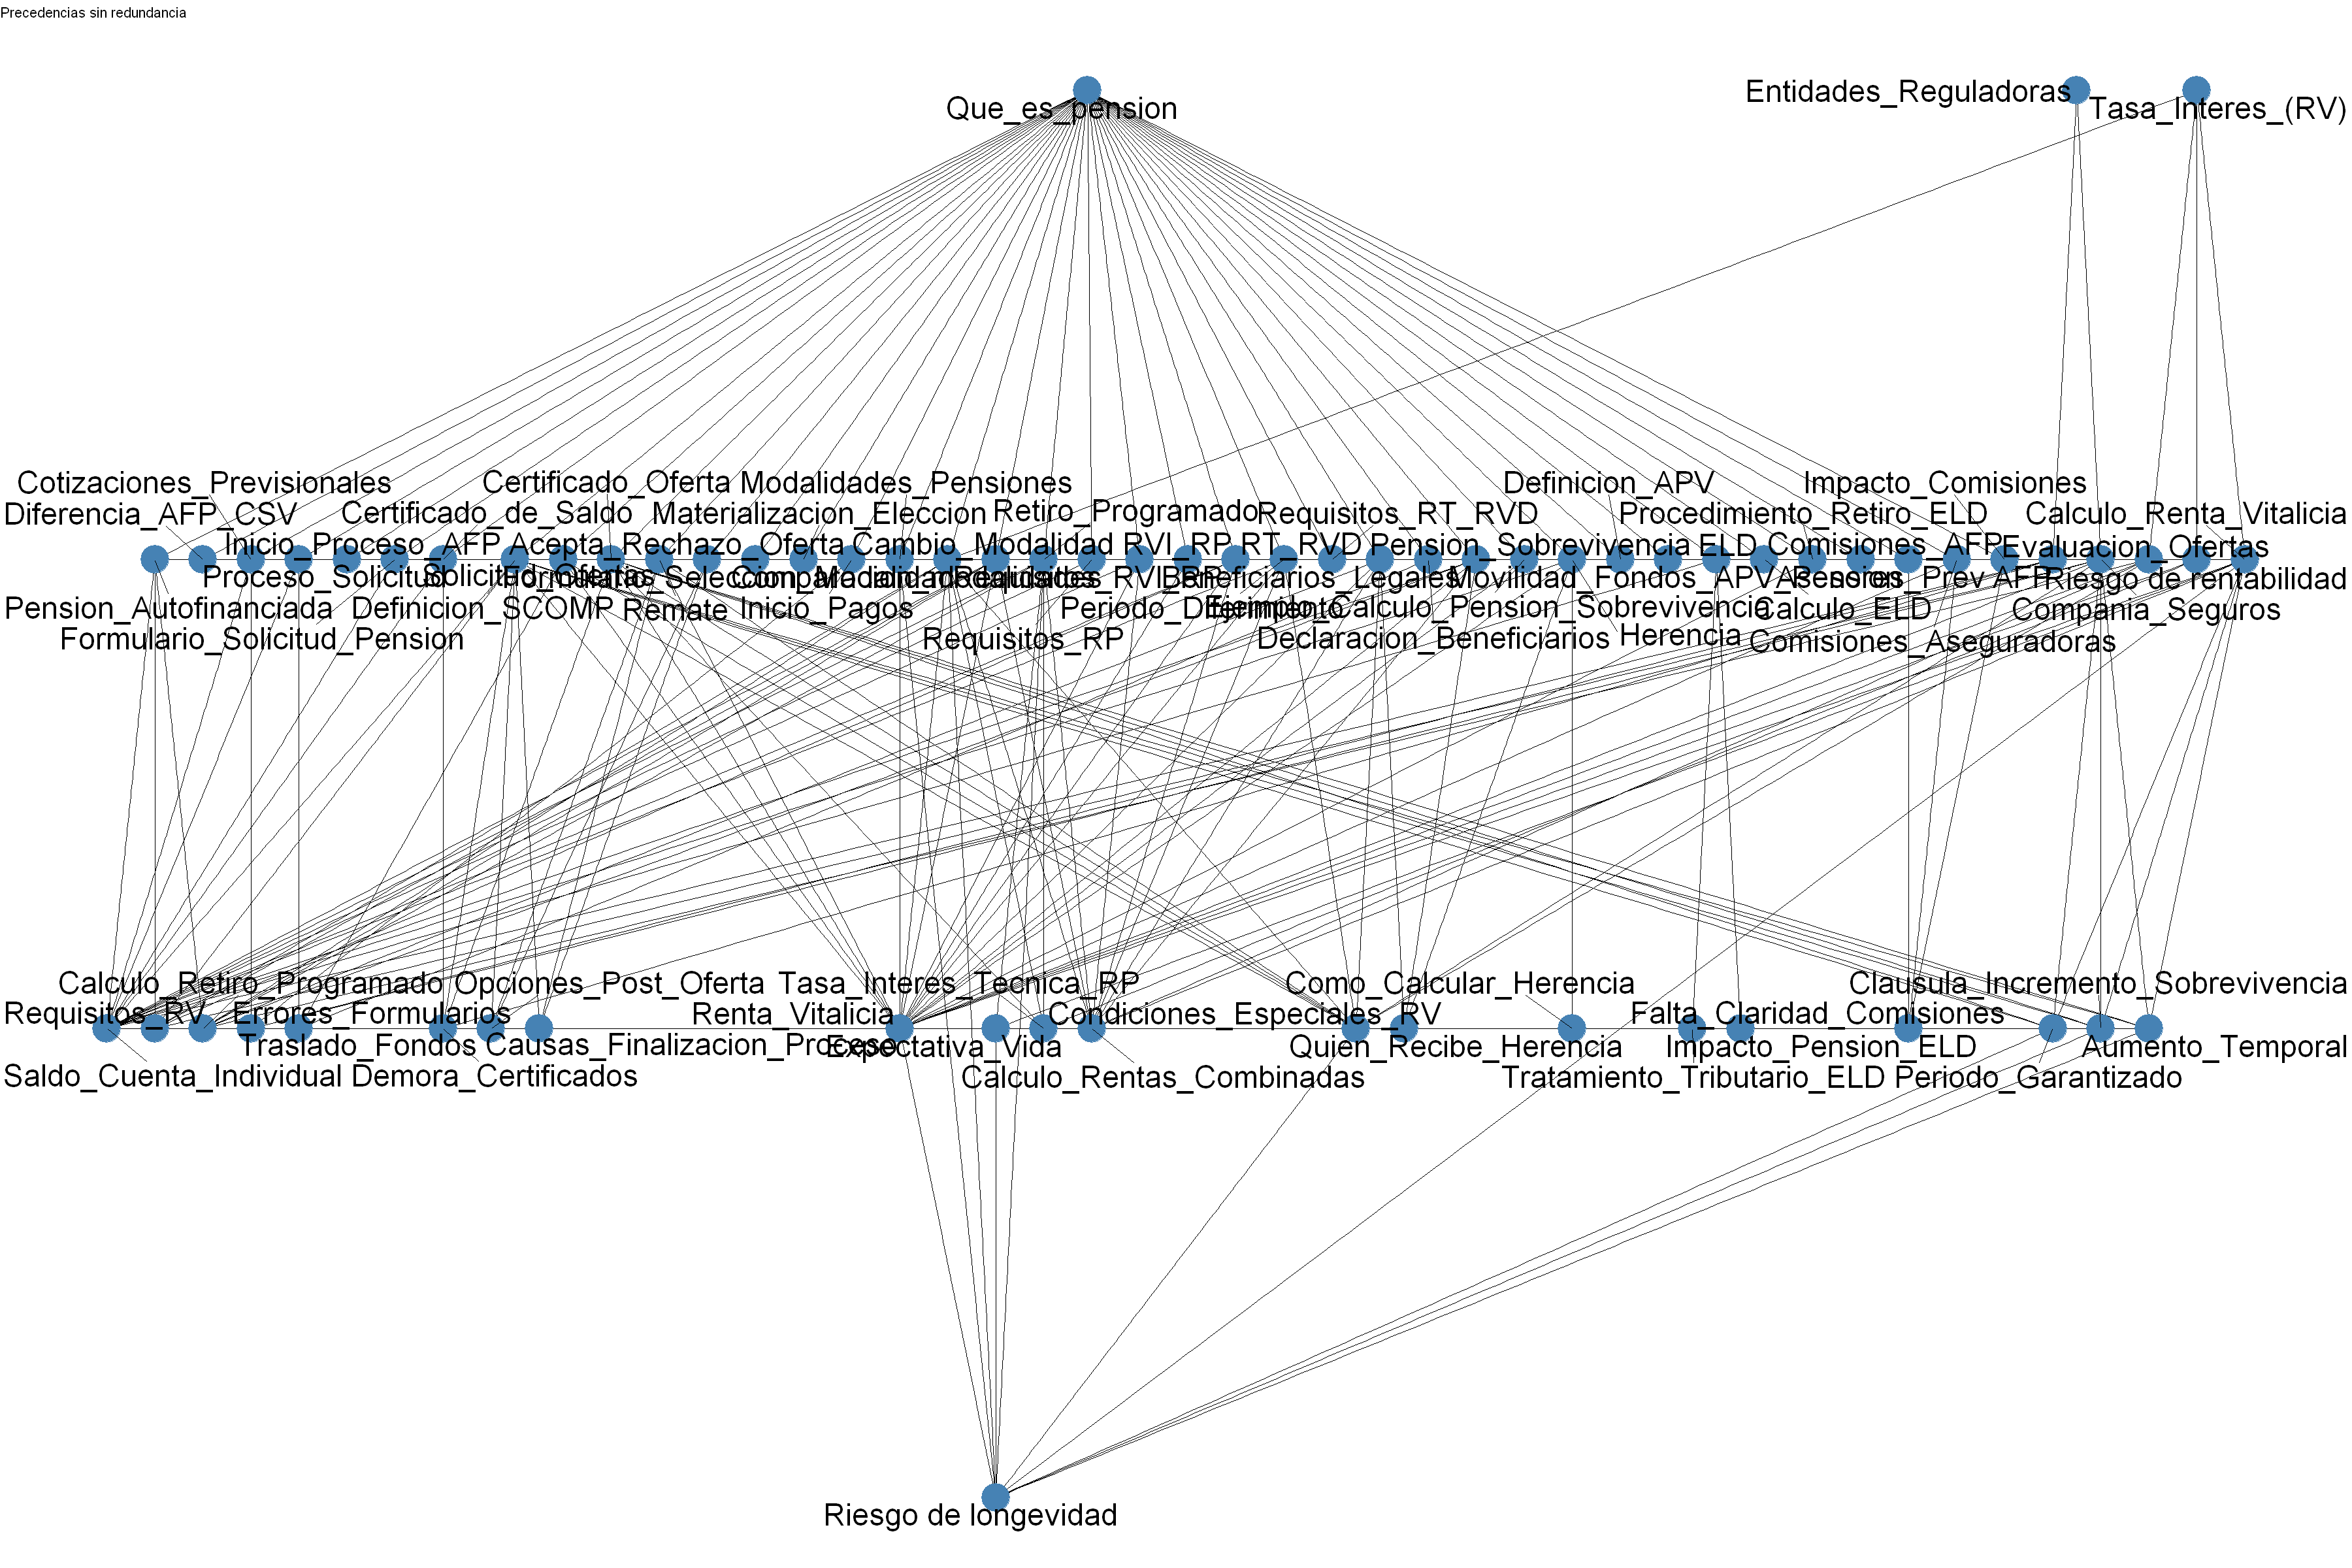

In [12]:
options(repr.plot.width = 30, repr.plot.height = 20)
# Convertir tu grafo igraph a tidygraph
grafo_tidy <- as_tbl_graph(g)

# Visualizar
ggraph(grafo_tidy, layout = "tree") +
  geom_edge_link(arrow = arrow(length = unit(1, 'mm')), end_cap = circle(2.5, 'mm')) +
  geom_node_point(size = 12, color = "steelblue") +
  geom_node_text(aes(label = name), repel = TRUE, size = 10, max.overlaps = Inf) +
  theme_void() +
  ggtitle("Precedencias sin redundancia")

In [13]:
eliminar_aristas_redundantes <- function(g) {
  aristas <- as_data_frame(g, what = "edges")
  redundantes <- c()

  for (i in seq_len(nrow(aristas))) {
    from <- aristas$from[i]
    to   <- aristas$to[i]
    
    # Eliminar temporalmente la arista
    g_temp <- delete_edges(g, E(g, P = c(from, to)))

    # Comprobar si existe otra ruta de from a to
    caminos <- suppressWarnings(all_simple_paths(g_temp, from = from, to = to))
    
    # Solo marcar como redundante si hay otro camino alternativo
    if (length(caminos) > 0) {
      redundantes <- c(redundantes, i)
    }
    cat(sprintf("Revisando %d de %d: %s → %s\n", i, nrow(aristas), from, to))
  flush.console()
  }

  # Eliminar aristas redundantes del grafo original
  g_sin <- delete_edges(g, E(g)[redundantes])
  return(g_sin)
}


In [14]:
g_sin_redundancia <- eliminar_aristas_redundantes(g)


Revisando 1 de 387: Que_es_pension → Pension_Autofinanciada
Revisando 2 de 387: Que_es_pension → Diferencia_AFP_CSV
Revisando 3 de 387: Que_es_pension → Cotizaciones_Previsionales
Revisando 4 de 387: Que_es_pension → Proceso_Solicitud
Revisando 5 de 387: Que_es_pension → Inicio_Proceso_AFP
Revisando 6 de 387: Que_es_pension → Formulario_Solicitud_Pension
Revisando 7 de 387: Que_es_pension → Certificado_de_Saldo
Revisando 8 de 387: Que_es_pension → Definicion_SCOMP
Revisando 9 de 387: Que_es_pension → Solicitud_Ofertas
Revisando 10 de 387: Que_es_pension → Certificado_Oferta
Revisando 11 de 387: Que_es_pension → Remate
Revisando 12 de 387: Que_es_pension → Acepta_Rechazo_Oferta
Revisando 13 de 387: Que_es_pension → Formulario_Seleccion_Modalidad
Revisando 14 de 387: Que_es_pension → Materializacion_Eleccion
Revisando 15 de 387: Que_es_pension → Inicio_Pagos
Revisando 16 de 387: Que_es_pension → Modalidades_Pensiones
Revisando 17 de 387: Que_es_pension → Comparacion_modalidades
Revisando

In [15]:
matriz_sin_redundancia <- as_adjacency_matrix(g_sin_redundancia, sparse = FALSE)

In [16]:
# Crea un grafo dirigido a partir de la matriz de adyacencia sin redundancias.

g_sin_redundancia <- graph_from_adjacency_matrix(
  matriz_sin_redundancia,
  mode = "directed",
  diag = FALSE
)

Using "sugiyama" as default layout


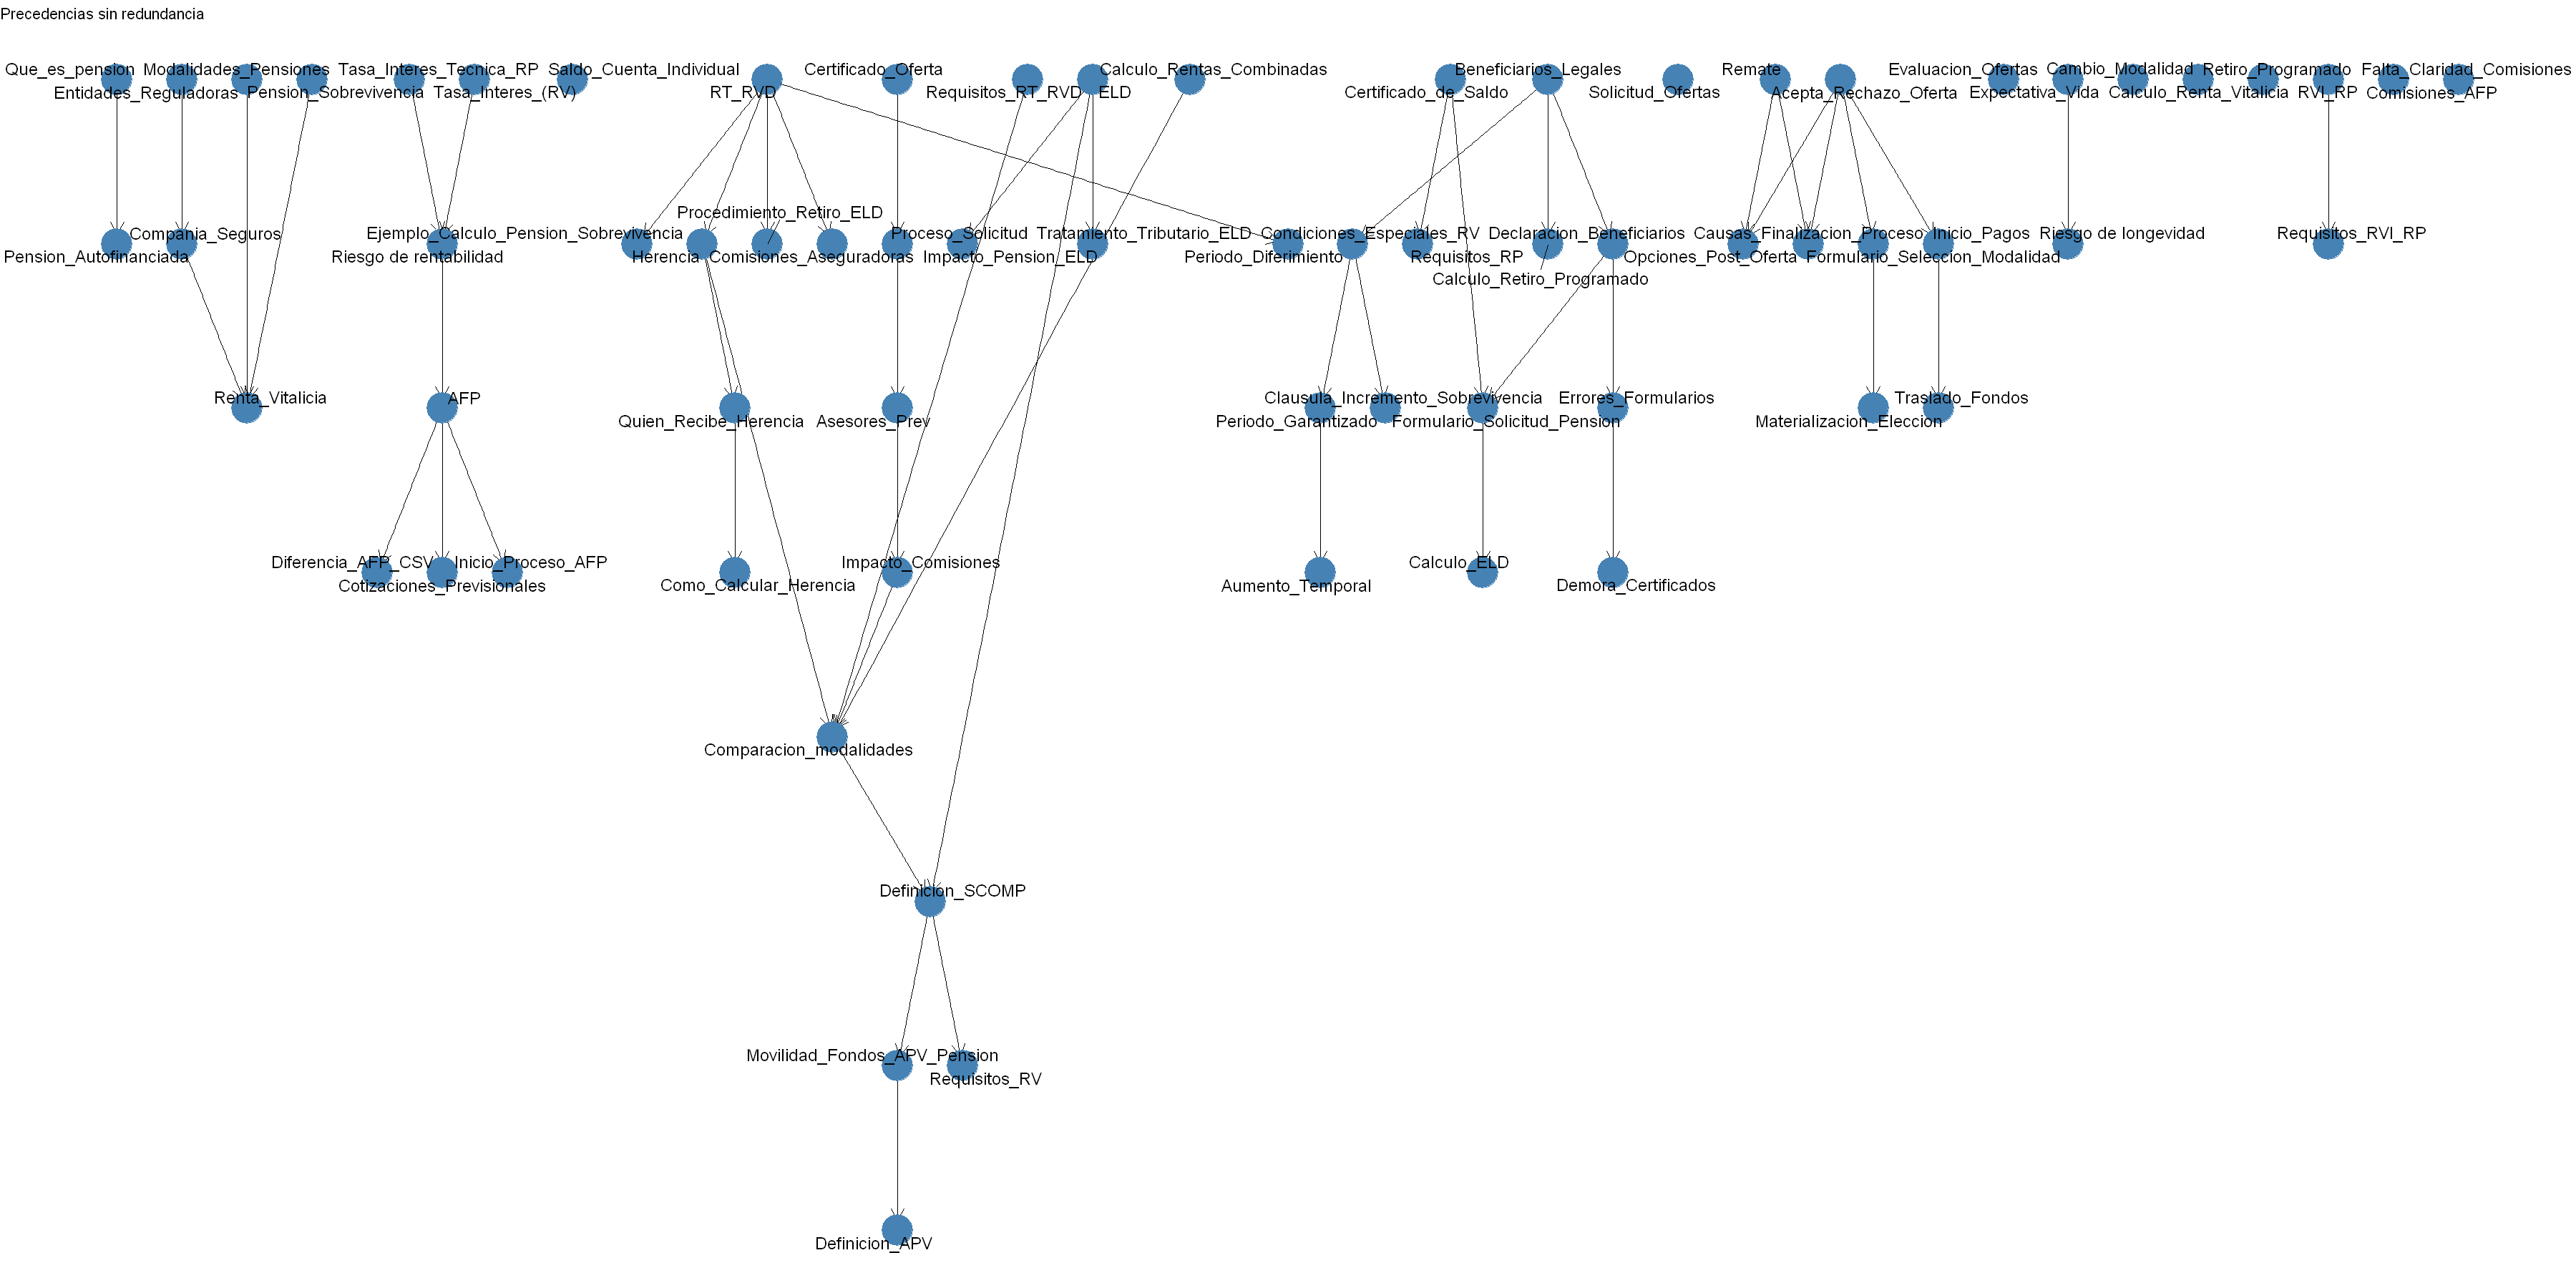

In [27]:
options(repr.plot.width = 30, repr.plot.height = 15)
# Convertir tu grafo igraph a tidygraph
grafo_tidy <- as_tbl_graph(g_sin_redundancia)

# Visualizar
ggraph(grafo_tidy) +
  geom_edge_link(arrow = arrow(length = unit(4, 'mm')), end_cap = circle(3, 'mm')) +
  geom_node_point(size = 12, color = "steelblue") +
  geom_node_text(aes(label = name), repel = TRUE, size = 5, max.overlaps = Inf) +
  theme_void() +
  ggtitle("Precedencias sin redundancia")

In [28]:
# Convertimos a data.frame y agregamos la columna con los nombres de fila
df_matriz <- as.data.frame(matriz_sin_redundancia)
df_matriz <- tibble::rownames_to_column(df_matriz, var = "Concepto")
write_xlsx(df_matriz, path = "matriz_sin_redundancia_v2.xlsx")


In [ ]:
ggsave(
  filename = "grafo_precedencias.png",
  width = 30,
  height = 15,
  dpi = 300  # alta resolución
)
